# Data Basics Pipeline

This example is going to draw upon all of the topics we have covered in this workshop series and see how they all fit together.

---

## Importing a CSV file into a table using sqlite3 tool
---
In the first scenario, you want to import data from CSV file into a table that does not exist in the SQLite database.

First, the sqlite3 tool creates the table. The sqlite3 tool uses the first row of the CSV file as the names of the columns of the table.
Second, the sqlite3 tool import data from the second row of the CSV file into the table.
We will import a CSV file named service_requests.csv

First, fire up a terminal window and run the following commands:

This command will load a newer version of sqlite that can import CSV files. Once we have run that, then we can launch the sqlite command line:

Set the mode to CSV to instruct the command-line shell program to interpret the input file as a CSV file (as opposed to a plain text file). To do this, you use the .mode command as follows:

Next, import the csv file as an sql table using the following:

To verify the import, you use the .schema command to display the structure of the requests table:

Import the codebook csv file into the table `codes`:

We should see something that looks like this:

Save the table as a .db file using the .clone command:

Now we can use this file like we have all along! You can exit sqlite3 and it will still be in our directory to work with again later. 

## Working with python and pandas
---
Let's open up our database again and use pandas to extract some useful information.

In [1]:
import sqlite3
import pandas as pd
%matplotlib inline

sqlite_file = 'service_requests.db'
conn = sqlite3.connect(sqlite_file)

query = '''
SELECT * from requests
LIMIT 5;
'''

df = pd.read_sql(query, conn)
df

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,168714,2017-07-10T14:32:00,Fire Safety System Not Working,Control Panel,1,"Permits, Licenses and Inspections",Carrick,4,29,42003290400,3,29,3,4-15,-79.9802787818208,40.388412239931,APPROXIMATE
1,251339,2018-05-22T12:12:00,Illegal Dumping,Website,1,DOMI - Permits,Garfield,9,10,42003101700,2,10,5,3-4,-79.9383358208793,40.4663576825306,APPROXIMATE
2,168709,2017-07-10T14:29:00,Potholes,Call Center,1,DPW - Street Maintenance,Polish Hill,7,6,42003060500,6,6,2,2-6,-79.9659083883606,40.4570735753106,EXACT
3,168710,2017-07-10T14:30:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,-80.0339164685951,40.4717751783641,APPROXIMATE
4,189977,2017-09-27T17:02:00,Manhole Cover,Call Center,0,DOMI - Permits,Central Business District,6,2,42003020100,6,2,2,1-3,-80.0002635,40.4432402,EXACT


In [2]:
query = '''
SELECT * from codes
LIMIT 5;
'''

df = pd.read_sql(query, conn)
df

,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
0,Accessibility,Americans with Disabilities,,City Planning - Disabilities,Block Level,
1,Accessibility,City Facility,,DPW - Facilities,Block Level,
2,Accessibility,"Handicap Ramp, Repair",,DPW - Construction Division,Block Level,
3,Accessibility,"Handicap Ramp, Request for Installation",,DPW - Transportation & Engineering,Block Level,
4,Accessibility,"Sidewalk, Lack of Snow/Ice Removal",,311,Block Level,


These tables can be joined on request_type = issue, so lets leverage that to reduce our dimensionality when trying to visualize the volume of request types for each neighborhood by grouping on category. First, using sqlite:

In [5]:
query = '''
SELECT * from requests
JOIN codes on requests.request_type = codes.issue
LIMIT 5;
'''

df = pd.read_sql(query, conn)
df

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,FIRE_ZONE,X,Y,GEO_ACCURACY,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
0,251339,2018-05-22T12:12:00,Illegal Dumping,Website,1,DOMI - Permits,Garfield,9,10,42003101700,...,3-4,-79.9383358208793,40.4663576825306,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,,DPW - Permits,Neighborhood,
1,168709,2017-07-10T14:29:00,Potholes,Call Center,1,DPW - Street Maintenance,Polish Hill,7,6,42003060500,...,2-6,-79.9659083883606,40.4570735753106,EXACT,Road/Street Issues,Potholes,,DPW - Street Maintenance,Block Level,
2,168710,2017-07-10T14:30:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1,27,42003271500,...,1-14,-80.0339164685951,40.4717751783641,APPROXIMATE,Parking,Abandoned Vehicle (parked on street),,Police - AVU,Neighborhood,
3,214948,2018-02-01T02:03:00,Crossing Guards,Website,1,School Guards,Perry North,1,26,42003260700,...,1-23,-80.0113288,40.4750052,EXACT,Public Safety,Crossing Guards,,School Guards,Block Level,
4,214949,2018-02-01T05:47:00,Potholes,Website,1,DPW - Street Maintenance,Mt. Oliver,3,16,42003561700,...,4-8,-79.9803343,40.4099153,EXACT,Road/Street Issues,Potholes,,DPW - Street Maintenance,Block Level,


Alternatively, we can perform this join with pandas:

In [4]:
query = '''
SELECT * from requests;
'''
request_df = pd.read_sql(query, conn)

query = '''
SELECT * from codes;
'''
codes_df = pd.read_sql(query, conn)

merged_df = pd.merge(request_df, codes_df, left_on="REQUEST_TYPE", right_on="Issue")
merged_df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,FIRE_ZONE,X,Y,GEO_ACCURACY,Category,Issue,Definition,Department,Public Access Level,Suggested Access Level
0,251339,2018-05-22T12:12:00,Illegal Dumping,Website,1,DOMI - Permits,Garfield,9,10,42003101700,...,3-4,-79.9383358208793,40.4663576825306,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,,DPW - Permits,Neighborhood,
1,4351,2015-05-11T12:40:00,Illegal Dumping,Call Center,1,DOMI - Permits,Garfield,9,10,42003101700,...,3-4,-79.9435329354207,40.4674181458992,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,,DPW - Permits,Neighborhood,
2,167825,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1,23,42003563200,...,1-20,-79.9977634939938,40.4526950987694,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,,DPW - Permits,Neighborhood,
3,168707,2017-07-10T14:26:00,Illegal Dumping,Website,1,DOMI - Permits,East Allegheny,1,23,42003563200,...,1-5,-79.9969562987425,40.4572406128804,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,,DPW - Permits,Neighborhood,
4,168519,2017-07-10T10:52:00,Illegal Dumping,Website,1,DOMI - Permits,South Side Flats,3,16,42003160900,...,4-24,-79.9682698891347,40.4258852005342,APPROXIMATE,Garbage and Litter Issues,Illegal Dumping,,DPW - Permits,Neighborhood,


We get the same exact output, just using different methods.

Cool - so let's say we want to concern ourselves with the potholes in Pittsburgh. Let's restrict our search to just those requests:

In [6]:
query = '''
SELECT * 
FROM requests
WHERE request_type = 'Potholes'

LIMIT 5;
'''

df = pd.read_sql(query, conn)
df

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,168709,2017-07-10T14:29:00,Potholes,Call Center,1,DPW - Street Maintenance,Polish Hill,7,6,42003060500,6,6,2,2-6,-79.9659083883606,40.4570735753106,EXACT
1,214949,2018-02-01T05:47:00,Potholes,Website,1,DPW - Street Maintenance,Mt. Oliver,3,16,42003561700,3,16,3,4-8,-79.9803343,40.4099153,EXACT
2,168717,2017-07-10T14:35:00,Potholes,Call Center,1,DPW - Street Maintenance,Carrick,4,29,42003290100,3,29,3,4-23,-79.9872118,40.3948474,EXACT
3,6974,2015-06-01T07:35:00,Potholes,Call Center,1,DPW - Street Maintenance,Bloomfield,7,8,42003080400,2,8,5,3-6,-79.9448913,40.4594295,EXACT
4,214951,2018-02-01T06:27:00,Potholes,Report2Gov Android,1,DPW - Street Maintenance,Bon Air,4,18,42003562400,5,18,3,4-7,-80.0044369697571,40.4114821596499,EXACT


Now let's say we want to find out which neighborhoods have the most potholes - we'll write a query to group our results appropriately:

In [7]:
query = '''
SELECT neighborhood, count(request_type) AS num_potholes
FROM requests
WHERE request_type = 'Potholes'
GROUP BY neighborhood
ORDER BY num_potholes DESC
LIMIT 20;
'''

df = pd.read_sql(query, conn)
df

,NEIGHBORHOOD,num_potholes
0,Brookline,2509
1,Carrick,1925
2,Bloomfield,1731
3,Squirrel Hill South,1706
4,Central Lawrenceville,1271
5,Shadyside,1020
6,Lincoln-Lemington-Belmar,994
7,Stanton Heights,989
8,Overbrook,962
9,South Side Flats,950


We notice that at index 19 we have a '' value (not null, just an empty string) - this is probably just aggregating all of the potholes for which no neighborhood was reported. We can get rid of this.

Let's also take a deeper dive here and try to determine how many pothole reports occur over time.

In [12]:
query = '''
SELECT neighborhood, count(request_type) AS num_potholes, substr(created_on, 0, 5) AS year
FROM requests
WHERE request_type = 'Potholes' AND neighborhood != ''
GROUP BY neighborhood, year
ORDER BY year DESC, num_potholes DESC
LIMIT 40
OFFSET 10;
'''

df = pd.read_sql(query, conn)
df

,NEIGHBORHOOD,num_potholes,year
0,South Side Flats,420,2018
1,North Oakland,389,2018
2,Overbrook,376,2018
3,Stanton Heights,375,2018
4,Point Breeze,364,2018
5,Hazelwood,358,2018
6,East Liberty,327,2018
7,Mount Washington,307,2018
8,Lincoln-Lemington-Belmar,297,2018
9,Central Oakland,281,2018


Finally, let's try visualizing these for a particular neighborhood with a time series plot:


SELECT neighborhood, count(request_type) AS num_potholes, substr(created_on, 0, 5) AS year
FROM requests
WHERE request_type = 'Potholes' AND neighborhood = 'North Oakland'
GROUP BY neighborhood, year
ORDER BY year ASC
LIMIT 20;



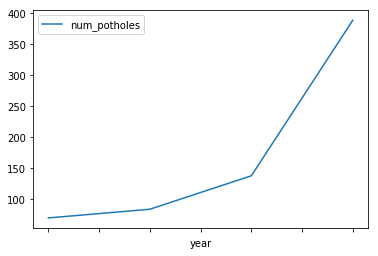

In [11]:
# select data for north oakland

request_type = "Potholes"
neighborhood = "North Oakland"

# Use Python 3.7 format strings
query = f'''
SELECT neighborhood, count(request_type) AS num_potholes, substr(created_on, 0, 5) AS year
FROM requests
WHERE request_type = '{request_type}' AND neighborhood = '{neighborhood}'
GROUP BY neighborhood, year
ORDER BY year ASC
LIMIT 20;
'''
print(query)

df = pd.read_sql(query, conn, index_col='year',parse_dates=True)

df.plot();